In [2]:
import numpy as np
import matplotlib.pyplot as plt

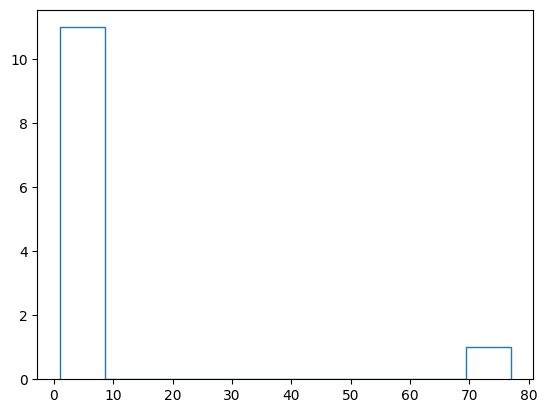

In [4]:
x = [1,1,1,1,2,3,4,5,5,6,7,77]


In [3]:
x =2 
1 <= x <= 3 <= 1

False

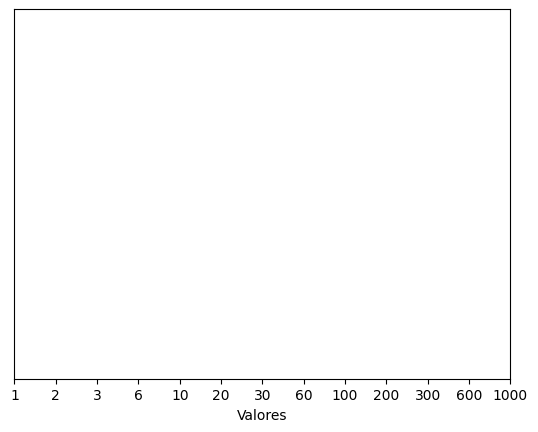

In [12]:
# Limites dos bins fornecidos
bins_proposta = [1, 2, 3, 6, 10, 20, 30, 60, 100, 200, 300, 600, 1000]

# Calculando a transformação logarítmica dos limites dos bins
log_bins = np.log10(bins_proposta)

# Calculando os pontos no eixo x
x_positions = np.arange(len(bins_proposta))

# Criando o plot vazio
fig, ax = plt.subplots()

# Adicionando os pontos destacados no eixo x
ax.set_xticks(x_positions)
# Modificando os rótulos do eixo x para corresponder aos limites dos bins
ax.set_xticklabels(bins_proposta)

# Ocultando a barra de eixo y (pois não estamos plotando nada lá)
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionando título ao eixo x
plt.xlabel('Valores')

# Exibindo o plot
plt.show()

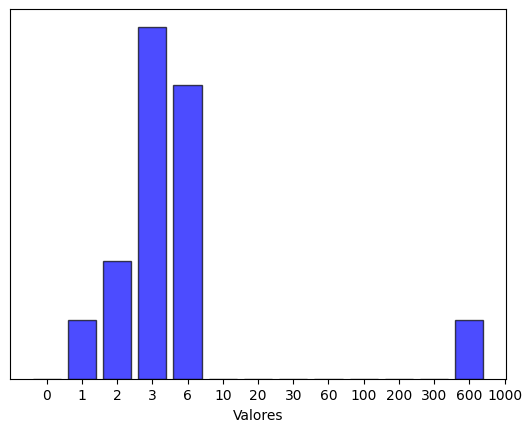

In [30]:
# Dados de exemplo
data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 8, 9, 999]

# Limites dos bins fornecidos
bins_proposta = [0, 1, 2, 3, 6, 10, 20, 30, 60, 100, 200, 300, 600, 1000]

# Calculando os pontos no eixo x
x_positions = np.arange(len(bins_proposta))

# Criando o plot vazio
fig, ax = plt.subplots()

# Adicionando os pontos destacados no eixo x
ax.set_xticks(x_positions)
# Modificando os rótulos do eixo x para corresponder aos limites dos bins
ax.set_xticklabels(bins_proposta)

# Ocultando a barra de eixo y (pois não estamos plotando nada lá)
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionando título ao eixo x
plt.xlabel('Valores')

# Criando o histograma manualmente
hist_values, _ = np.histogram(data, bins=bins_proposta)

plt.bar(x_positions[:-1], hist_values, width=0.8, color='blue', edgecolor='black', alpha=0.7)

# Exibindo o plot
plt.show()

In [3]:
from scipy.signal import convolve2d
import numpy as np

In [13]:
neighborhood = 1
kernel_side = (2*neighborhood+1)
KERNEL = np.ones((kernel_side, kernel_side), dtype=np.int8)
middle = int(kernel_side/2)
KERNEL[middle][middle] = 0

def evolve(M, boundary='fill'):
    kws = dict(mode='same', boundary=boundary)
    Resident_neighs = convolve2d(M == 0,  KERNEL, **kws)
    return Resident_neighs

In [14]:
M = np.array([[1,0,1],
              [-1,-1,0],
              [1,-1,1]])
r = evolve(M)
print(r)

[[1 1 2]
 [1 2 1]
 [0 1 1]]


In [2]:
a = 2

if a == 0:
    print('zero')

elif a == 1:
    print('um')

elif a == 2:
    print('dois')

#print('de 0 a 2')

else:
    print('maior que dois')

dois


In [8]:
args = [('minimal_neighbors_merchant_density', 5/8), ('minimal_merchant_neighbors_resident_density', 1)]

def func(args):
    print(args)
    for arg in args:
        print(arg)

func(args)

[('minimal_neighbors_merchant_density', 0.625), ('minimal_merchant_neighbors_resident_density', 1)]
('minimal_neighbors_merchant_density', 0.625)
('minimal_merchant_neighbors_resident_density', 1)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from matplotlib import colors
from IPython import display
import time
from scipy.signal import convolve2d
import os

import functionsAndClasses as fc

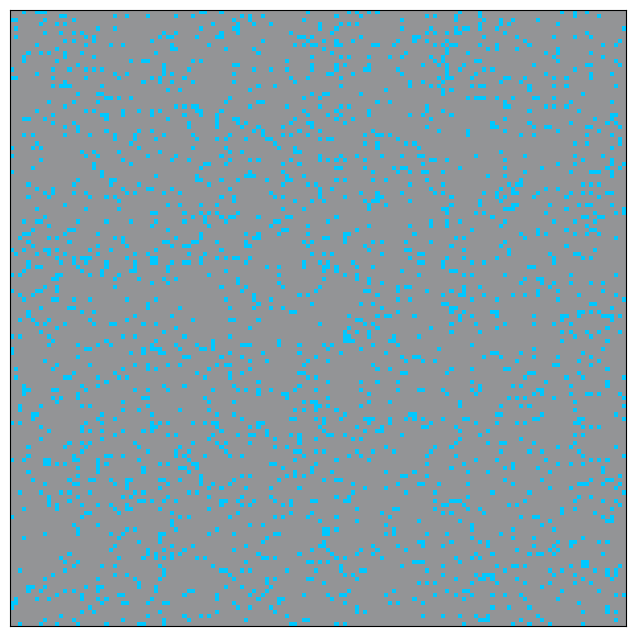

In [12]:
L = 150
agentDensity = 0.1
number = 0
residentRelativeDensity = 0
timeSteps = 10000
periodicBoundaries = True
unitaryEvolution = False
plot = True
args = [('neighborhood', 1), ('minimal_neighbors_merchant_density', number/8), ('minimal_merchant_neighbors_resident_density', 0)]

city = fc.City(L, agentDensity, residentRelativeDensity)
city.change_properties(args)

if unitaryEvolution:
    for i in range(timeSteps * 1000):
        city.evolve_unitary(periodicBoundaries, 1)
    
        if i%50 == 0 and plot:
            city.print_city()
            display.clear_output(wait=True)

    display.clear_output(wait=True)
    city.print_city()


else:
    for i in range(timeSteps):
        # stop condition
        if i%5 == 0:
            oldCity = np.copy(city.city)
            city.evolve(periodicBoundaries, 1)
            dif = oldCity - city.city
            if all(all(element == 0) for element in dif):
                city.print_city()
                break

        else:
            city.evolve(periodicBoundaries, 1)

        if i%200 == 0 and plot:
            city.print_city()
            display.clear_output(wait=True)

    display.clear_output(wait=True)
    city.print_city()